# Data Wrangling Report

In [2]:
import numpy as np
import pandas as pd
import tweepy
import requests
import json
import sys
import re

## Gather
The following code is meant for gathering data and storing them into pandas DataFrames.

The enhanced Twitter archive for the WeRateDogs tweet collection is provided as a file to us. We load this CSV file into our environment using the `pandas.read_csv` function.

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [61]:
df_archive.shape

(2356, 17)

The predictions for the dog breed along with their image links are provided in another dataset at [this location](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). We can download the data using the `requests` library, and load it as a TSV file using the same function as above.

In [62]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [63]:
req = requests.get(image_predictions_url)
open(image_predictions_url.split('/')[-1], 'wb').write(req.content)

335079

In [4]:
df_preds = pd.read_csv('image-predictions.tsv', sep='\t')
df_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Now, for the above tweets, using the `tweet_id`, we obtain more information from Twitter using the `tweepy` API.

First, we setup the `tweepy` API to create an API object.

In [65]:
# Setup for tweepy
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

We now write the tweet statuses by obtaining it using the API via `tweet_id`. We store all these results in `tweet_json.txt`.

In [ ]:
with open('tweet_json.txt', 'w+') as file:
    for tweet_id in df_archive['tweet_id']:
        try:
            tweet_status = api.get_status(tweet_id, tweet_mode='extended')
            tweet_json = tweet_status._json
            json.dump(tweet_json, file)
            file.write('\n')
        except:
            e = sys.exc_info()[0]
            print(tweet_id)
            print("Error: " + str(e))

892420643555336193
Error: <class 'tweepy.error.TweepError'>
892177421306343426
Error: <class 'tweepy.error.TweepError'>
891815181378084864
Error: <class 'tweepy.error.TweepError'>
891689557279858688
Error: <class 'tweepy.error.TweepError'>
891327558926688256
Error: <class 'tweepy.error.TweepError'>
891087950875897856
Error: <class 'tweepy.error.TweepError'>
890971913173991426
Error: <class 'tweepy.error.TweepError'>
890729181411237888
Error: <class 'tweepy.error.TweepError'>
890609185150312448
Error: <class 'tweepy.error.TweepError'>
890240255349198849
Error: <class 'tweepy.error.TweepError'>
890006608113172480
Error: <class 'tweepy.error.TweepError'>
889880896479866881
Error: <class 'tweepy.error.TweepError'>
889665388333682689
Error: <class 'tweepy.error.TweepError'>
889638837579907072
Error: <class 'tweepy.error.TweepError'>
889531135344209921
Error: <class 'tweepy.error.TweepError'>
889278841981685760
Error: <class 'tweepy.error.TweepError'>
888917238123831296
Error: <class 'tweepy

Now, we open the file `tweet_json.txt` and store information like `tweet_id`, `retweet_count`, and `favorite_count` in a DataFrame.

In [5]:
tweet_info_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_json = json.loads(line)
        tweet_id = tweet_json['id_str']
        retweet_count = tweet_json['retweet_count']
        favorite_count = tweet_json['favorite_count']
        tweet_info_dict = {'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count}
        tweet_info_list.append(tweet_info_dict)
df_tweet_info = pd.DataFrame(tweet_info_list)
df_tweet_info.head()

,favorite_count,retweet_count,tweet_id
0,36274,7725,892420643555336193
1,31279,5709,892177421306343426
2,23546,3783,891815181378084864
3,39566,7878,891689557279858688
4,37789,8495,891327558926688256


Now, we have three DataFrames: `df_archive` for tweet and rating information, `df_preds` for dog species predictions, and `df_tweet_info` for additional tweet information. This concludes our gathering part.

## Assess

We now assess the above data to find quality and tidiness issues.

In [ ]:
df_archive.info()

In [ ]:
df_archive.head()

Though the `tweet_id` is a number, we cannot perform numeric operations on it. It is solely used to identify a tweet. We should convert it to a `str` type instead.

The `expanded_urls` field is redundant. We can easily form the tweet URL by using the `tweet_id` values.

The in-reply and retweeted columns have too many null values. These denote tweets by the WeRateDogs handle that are retweets or replies to someone. Since these won't be helpful for analysis as we only need tweets where dogs are rated, we remove the observations that contain non-null values for these columns. These columns will then contain nulls and we will no longer require them as well. so we must drop these columns after removing the replies/retweets.

The `timestamp` field is a string. It should be a `datetime` type instead.

In [ ]:
df_archive.source.value_counts()

The `source` field doesn't seem useful. It provides how the tweet was made, and most of them were done via the iPhone app. This field is irrelevant to our analysis, and so we drop it.

In [ ]:
df_archive.query('rating_denominator != 10 and  not (in_reply_to_status_id == in_reply_to_status_id or retweeted_status_id == retweeted_status_id)')

The last four columns (`doggo`, `floofer`, `pupper`, and `puppo`) denote the growth stages of the dogs (i.e., how old they are during the time of rating). Also, not all dogs have this stage mentioned. We should condense this into one column as according to the tidy data principles, each variable should be a column. Here, we have four columns for one variable `growth`, and hence, these should be reduced to one column.

In [ ]:
df_preds.info()

In [ ]:
df_archive.name.value_counts()

The `name` column has many 'None' names and some invalid names like 'a'. We should replace the 'None' and invalid names with NaN.

In [ ]:
df_preds.head()

In [ ]:
df_preds.info()

The images are already present in the tweets, hence the `jpg_url` column in `df_preds` is redundant and should be dropped.

In [ ]:
df_tweet_info.info()

In [ ]:
df_tweet_info.head()

For tidiness, every type of observational unit should form a table. The tweets are a type of observational unit, but are divided into two tables `df_archive` and `df_tweet_info`. To tidy our data, we merge them into a single table.

### Quality

1. Convert `tweet_id` in all the DataFrames to string type.
2. Drop the `expanded_urls` and the `source` column.
3. Drop the rows that have not-null values for the in-reply and retweeted columns, viz. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`.
4. Drop all the above columns after dropping the replies and retweets.
5. Convert `timestamp` to datetime type.
6. Calculate actual rating for tweets having a `rating_denominator` that is not 10.
7. Replace the 'None' and invalid names with NaN instead.
8. Drop the `jpg_url` column in `df_preds`.

### Tidiness

1. Condense the dog growth stage columns (`doggo`, `floofer`, `pupper`, and `puppo`) into one.
2. Join the `df_tweet_info` table to the `df_archive` table over `tweet_id`.

## Clean
Now that we have narrowed down the quality and tidiness issues found in our data, we can proceed to clean it. We first create a copy of the datasets for cleaning.

In [6]:
df_archive_clean = df_archive.copy()
df_preds_clean = df_preds.copy()
df_tweet_info_clean = df_tweet_info.copy()

### Quality

`1.` Convert `tweet_id` in all the DataFrames to string type.

#### Define
Use the `pandas.DataFrame.astype` method to convert the integer `tweet_id`s in the first two DataFrames to `str` type.
#### Code

In [7]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_preds_clean['tweet_id'] = df_preds_clean['tweet_id'].astype(str)

#### Test

In [8]:
print(df_archive_clean.info())
print(df_preds_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

`2.` Drop the `expanded_urls` and the `source` column.

#### Define
Use the `pandas.DataFrame.drop` method to drop the columns with `axis=1` as an argument.

#### Code

In [9]:
df_archive_clean = df_archive_clean.drop(['expanded_urls', 'source'], axis=1)

#### Test

In [10]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

`3.` Drop the rows that have not-null values for the in-reply and retweeted columns, viz. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`.

#### Define
Obtain the indices for all the rows having not-null values in the above columns and use the `pandas.DataFrame.drop` method to drop those rows.

#### Code

In [11]:
indices_to_drop = df_archive_clean[df_archive_clean['in_reply_to_status_id'].notnull() | df_archive_clean['in_reply_to_user_id'].notnull()
            | df_archive_clean['retweeted_status_id'].notnull() | df_archive_clean['retweeted_status_user_id'].notnull()
            | df_archive_clean['retweeted_status_timestamp'].notnull()].index
df_archive_clean = df_archive_clean.drop(indices_to_drop)

#### Test

In [12]:
df_archive_clean.shape

(2097, 15)

In [13]:
sum(df_archive_clean['in_reply_to_status_id'].notnull() | df_archive_clean['in_reply_to_user_id'].notnull()
            | df_archive_clean['retweeted_status_id'].notnull() | df_archive_clean['retweeted_status_user_id'].notnull()
            | df_archive_clean['retweeted_status_timestamp'].notnull())

0

`4.` Drop all the above columns after dropping the replies and retweets.

#### Define
Use the `pandas.DataFrame.drop` method to drop the columns with `axis=1` as an argument.

#### Code

In [14]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [15]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(8)
memory usage: 180.2+ KB


`5.` Convert `timestamp` to datetime type.

#### Define
Use the `pandas.to_datetime` function to convert the string into a datetime type.

#### Code

In [16]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [17]:
print(df_archive_clean['timestamp'].head())
print(df_archive_clean.info())

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB
None


`6.` Calculate actual rating for tweets having a `rating_denominator` that is not 10.

#### Define
Grab the ratings in the reverse order instead of considering the first occurrence of '/'.

#### Code 

In [18]:
df_archive_clean.query('rating_denominator != 10')['text']

433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1843    Here we have an entire platoon of puppers. Tot...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dt

In [19]:
for text in df_archive_clean.query('rating_denominator != 10')['text']:
    new_ratings = [s for s in text.split() if '/' in s and 't.co' not in s][-1].split('/')
    rating_numerator = int(re.search('[0-9]+', new_ratings[0])[0])
    rating_denominator = int(re.search('[0-9]+', new_ratings[1])[0])
    df_archive_clean.loc[df_archive_clean['text'] == text, 'rating_numerator'] = rating_numerator
    df_archive_clean.loc[df_archive_clean['text'] == text, 'rating_denominator'] = rating_denominator

#### Test

In [20]:
[t for t in df_archive_clean.query('rating_denominator != 10').text]

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK',
 "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa",
 "Happy Wednesday here's a bucket of pups. 44/40 would pet all a

Since these represent ratings for more than one dog, we deal with these tweets later.

`7.` Replace the 'None' and invalid names with NaN instead.

#### Define
Look for names without capital letters and remove them along with 'None' values.

#### Code 

In [21]:
invalid_names = set()
for name in df_archive_clean.name.unique():
    if re.search('^[A-Z]+', name) == None:
        invalid_names.add(name)
invalid_names.add('None')

In [22]:
df_archive_clean.loc[df_archive_clean['name'].isin(invalid_names), 'name'] = np.nan

#### Test

In [23]:
sum(df_archive_clean['name'].isin(invalid_names))

0

`8.` Drop the `jpg_url` column in `df_preds`.

#### Define
Use the `pandas.DataFrame.drop` method to drop the columns with `axis=1` as an argument.

#### Code 

In [24]:
df_preds_clean = df_preds_clean.drop('jpg_url', axis=1)

#### Test

In [25]:
df_preds_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


### Tidiness

`1.` Condense the dog growth stage columns (`doggo`, `floofer`, `pupper`, and `puppo`) into one.

#### Define
Create a new column called `growth`, which is a categorical variable having the above four values as categories, then drop the above four columns.

#### Code

In [26]:
df_archive_clean['growth'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '').apply(lambda x: "".join(x.astype(str)), axis=1).replace('', np.nan)

In [27]:
df_archive_clean['growth'].value_counts()

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggofloofer      1
doggopuppo        1
Name: growth, dtype: int64

Let us get rid of the double columns by replacing them with their initial growth stage 'doggo'.

In [28]:
df_archive_clean['growth'] = df_archive_clean['growth'].apply(lambda x: x if x != x or len(x) <= 7 else 'doggo')

In [29]:
df_archive_clean['growth'] = df_archive_clean['growth'].astype('category').cat.reorder_categories(['doggo', 'floofer', 'pupper', 'puppo'])

In [30]:
df_archive_clean = df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [31]:
df_archive_clean['growth'].value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: growth, dtype: int64

`2.` Join the `df_tweet_info` table to the `df_archive` table over `tweet_id`.

#### Define
Use the `pandas.DataFrame.merge` method to left join the two DataFrames on `tweet_id`.

#### Code

In [32]:
df_tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [33]:
df_archive_clean = df_archive_clean.merge(df_tweet_info_clean, on='tweet_id', how='left')

#### Test

In [34]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
growth                336 non-null category
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 149.7+ KB


In [35]:
df_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,growth,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,36274.0,7725.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,31279.0,5709.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,23546.0,3783.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,39566.0,7878.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,37789.0,8495.0


Our data is now clean, and the data wrangling step is complete. Let us now save the two DataFrames, `df_archive_clean` and `df_preds_clean` into CSV files.

In [70]:
df_archive_clean.to_csv('archive.csv', index=False)

In [71]:
df_preds_clean.to_csv('preds.csv', index=False)

# WeRateDogs Data Analysis and Visualization

After the data wrangling process is done, we now have clean data on which the analysis can be performed. Let us now obtain the clean data that is saved in the files `archive.csv` and `preds.csv`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [3]:
archive_df = pd.read_csv('archive.csv')
archive_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,growth,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,36274.0,7725.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,31279.0,5709.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,23546.0,3783.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,39566.0,7878.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,37789.0,8495.0


In [4]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
growth                336 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 147.5+ KB


In [5]:
archive_df['timestamp'] = pd.to_datetime(archive_df['timestamp'])

In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1390 non-null object
growth                336 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 147.5+ KB


In [7]:
preds_df = pd.read_csv('preds.csv')
preds_df.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Let us use this data to perform analysis. We shall answer the following questions.

1. What are the breeds that are most preferred (rated higher than normal) by WeRateDogs? Does WeRateDogs have a bias towards a particular dog breed or treats dog breeds equally?
2. Among the 'cute' growth references for dogs (viz. doggo, floofer, pupper, and puppo), which ones are the most used?
3. What is the preferred time of the day for reviewing the dogs?
4. What are the most popular tweets posted by WeRateDogs?
5. What are the most common names given to dogs?

## `1.` What are the breeds that are most preferred (rated higher than normal) by WeRateDogs? Does WeRateDogs have a bias towards a particular dog breed or treats dog breeds equally?

To answer this, let us sort the data by the ratings and select twenty of them. We also select ratings that are equal to 14 since it is the maximum proper rating for dogs given by the Twitter handle in the set, and the higher ones are made for special occassions like 4th of July, on Snoop Dogg, who is not actually a dog, etc.

In [8]:
ratings_top = archive_df.query('rating_numerator == 14').sort_values('rating_numerator', ascending=False)

We now obtain the `tweet_id` values of the top rated dogs and find their breeds. We only consider breeds with the confidence of more than 50% and which are actually dogs. We then see the unique counts of the breeds.

In [9]:
top_rated_tweets = set(ratings_top['tweet_id'])

In [10]:
top_breeds = preds_df.loc[preds_df['tweet_id'].isin(top_rated_tweets)].loc[preds_df['p1_conf'] > 0.5].loc[preds_df['p1_dog']]['p1']

In [11]:
top_breeds.value_counts()

golden_retriever           3
Pembroke                   3
French_bulldog             2
Irish_setter               1
Pomeranian                 1
Gordon_setter              1
Chihuahua                  1
bloodhound                 1
Rottweiler                 1
black-and-tan_coonhound    1
Eskimo_dog                 1
Name: p1, dtype: int64

It seems that WeRateDogs prefers Golden Retrievers and Pembroke Welsh Corgis the most, followed by French bulldogs! There is indeed a breed bias when it comes to giving the highest rating of 14!

## `2.` Among the 'cute' growth references for dogs (viz. doggo, floofer, pupper, and puppo), which ones are the most used?

We answer this question by checking the amount of usage for each of the above four 'cute' growth references in their respective columns.

In [12]:
cute_words_sum = archive_df['growth'].value_counts()
cute_words_sum

pupper     221
doggo       83
puppo       23
floofer      9
Name: growth, dtype: int64

Clearly, the word 'pupper' is the most popular, almost as double as 'doggo'. The word 'puppo' takes the third place and 'floofer' is barely used, with only 9 references.

## `3.` What is the preferred time of the day for reviewing the dogs?

Let us obtain the hour of posting and plot it on a graph to identify the preferred time of the day.

In [13]:
tweet_times = archive_df['timestamp'].dt.hour
tweet_times = tweet_times.value_counts().reset_index()

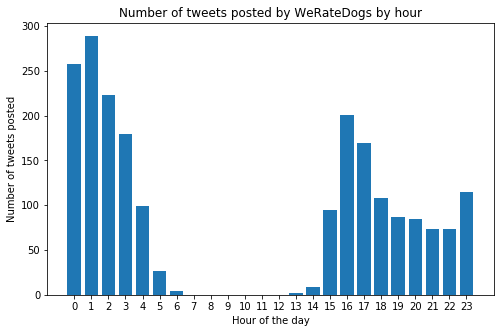

In [14]:
plt.figure(figsize=(8, 5))
plt.bar(data = tweet_times, x = 'index', height = 'timestamp')
ticks = list(range(0, 24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of tweets posted')
plt.xticks(ticks, ticks)
plt.title('Number of tweets posted by WeRateDogs by hour');

From the graph, it is clear that post-midnight (12-1 am) is the most preferred time for the WeRateDogs handle to post, followed by the evening (4-5 pm). There are no posts in the morning at all (7 am to 12 pm).

## `4.` What are the most popular tweets posted by WeRateDogs?

We can identify popularity by considering the favorite and retweet counts of the tweets. Since both factors are important to calculate popularity, and in general, [retweets matter more than favorites](https://medium.com/@Encore/favorites-vs-retweets-and-why-one-is-more-important-than-the-other-ba12ee20e9ba), we give slightly more weightage to retweets (about 65%) than favorites (about 35%).

In [33]:
tweets_popularity = archive_df.copy()
tweets_popularity['popularity'] = tweets_popularity['favorite_count'] * 0.35 + tweets_popularity['retweet_count'] * 0.65
pop_tweets = tweets_popularity.sort_values('popularity', ascending=False).head()

In [34]:
for text in pop_tweets.text:
    print(text)

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr


The above are the top five tweets of WeRateDogs by popularity. There is a link to the images of the dogs as well in each of them. We can also see that all of them are rated 13/10.

## `5.` What are the most common names given to dogs?

We can obtain the common names by checking how many times they were repeated. Let us visualize this as well in a bar graph.

In [40]:
archive_df['name'].value_counts().head(10).reset_index()

,index,name
0,Charlie,9
1,Cooper,8
2,Oliver,8
3,Tucker,8
4,Lucy,7
5,Penny,6
6,Bo,6
7,Koda,6
8,Daisy,6
9,Bailey,5


In [47]:
common_names = archive_df['name'].value_counts().head(10)#.sort_values('name', ascending=False)

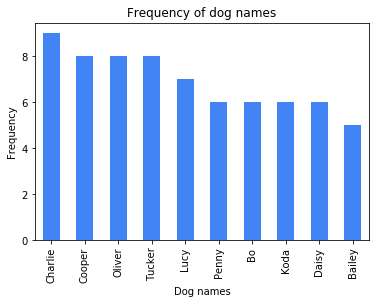

In [57]:
common_names.plot(kind='bar', color='#4284F5')
plt.xlabel('Dog names')
plt.ylabel('Frequency')
plt.title('Frequency of dog names');

Clearly, 'Lucy' and 'Charlie' are the most popular names. 'Oliver', 'Cooper', and 'Tucker' are pretty common as well.